### Agent-Lab: Coordinator -> Planner -> Supervisor Agent

Objective of this notebook is evaluating and adapting a [Multi-Agent Supervisor Architecture](https://langchain-ai.github.io/langgraph/concepts/multi_agent/#supervisor) with coordinator and execution planning steps.

#### Preparation steps:

Before executing the notebook perform the following preparation steps.

1. Start Docker containers: `docker compose up -d --build`

2. Verify application is up and running, with web browser: `http://localhost:18000/docs`

3. Inside project root directory, create a `.env` file with env vars with correct values:

    ```
    DEVELOPING="True"
    OLLAMA_ENDPOINT="http://localhost:11434"
    TAVILY_API_KEY="???"
    XAI_API_KEY="???"
    ```

---

In [1]:
%%capture

import os
os.chdir('..')

from IPython.display import Markdown, display
import json

from dotenv import load_dotenv
load_dotenv()

from notebooks import experiment_utils
from app.core.container import Container
from app.interface.api.messages.schema import MessageRequest

# start dependency injection container
container = Container()
container.init_resources()
container.wire(modules=[__name__])

In [2]:
# create agent
# agent = experiment_utils.create_ollama_agent(
#     agent_type="coordinator_planner_supervisor",
#     llm_tag="granite3.2:latest",
#     ollama_endpoint=os.getenv("OLLAMA_ENDPOINT")
# )

agent = experiment_utils.create_xai_agent(
    agent_type="coordinator_planner_supervisor",
    llm_tag="grok-2",
    api_key=os.getenv("XAI_API_KEY")
)

# updated_agent = experiment_utils.update_agent_setting(
#     agent_id=agent["id"],
#     setting_key="deep_search_mode",
#     setting_value="True"
# )

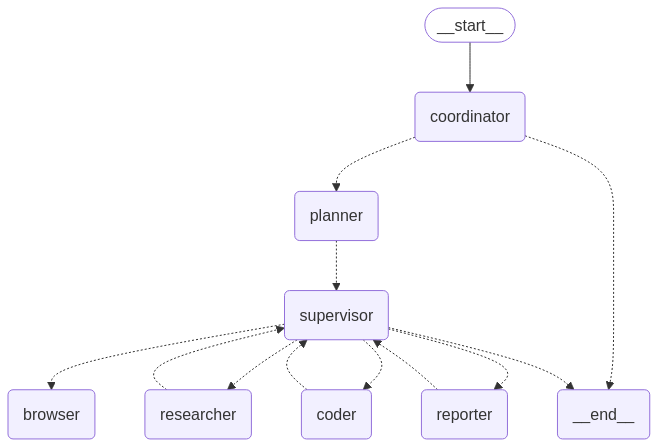

In [3]:
# get agent instance
coordinator_planner_supervisor_agent = container.coordinator_planner_supervisor_agent()

# get checkpointer instance
graph_persistence_factory = container.graph_persistence_factory()
checkpointer = graph_persistence_factory.build_checkpoint_saver()

# Create Graph
workflow_builder = coordinator_planner_supervisor_agent.get_workflow_builder(agent["id"])
workflow = workflow_builder.compile(checkpointer=checkpointer)
experiment_utils.print_graph(workflow)

In [4]:
agent_config = {
    "configurable": {
        "thread_id": agent["id"],
    },
    "recursion_limit": 30
}

### Evaluate Researcher

In [5]:
%%capture
message = MessageRequest(
    message_role="human",
    message_content="What characterizes a good general according to Sun Tzu?",
    agent_id=agent["id"]
)

inputs = coordinator_planner_supervisor_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [6]:
display(Markdown(f"```json\n{json.dumps(result['execution_plan'], indent=4)}\n```"))

```json
{
    "thought": "The user wants to understand the characteristics of a good general as described by Sun Tzu in his work, 'The Art of War'.",
    "title": "Characteristics of a Good General According to Sun Tzu",
    "steps": [
        {
            "agent_name": "researcher",
            "title": "Research Sun Tzu's 'The Art of War'",
            "description": "The researcher will gather information from 'The Art of War' by Sun Tzu, focusing on the characteristics of a good general. The output will be a Markdown report detailing these characteristics.\n\n**Responsibility**: Gather and summarize information on the characteristics of a good general from Sun Tzu's work.\n\n**Output**: A Markdown report summarizing the findings."
        },
        {
            "agent_name": "reporter",
            "title": "Compile Final Report",
            "description": "The reporter will compile a professional report based on the research findings from the previous step.\n\n**Responsibility**: Write a comprehensive report on the characteristics of a good general according to Sun Tzu.\n\n**Output**: A professional report in Markdown format."
        }
    ]
}
```

In [7]:
display(Markdown(result["messages"][-1].content))

# Characteristics of a Good General According to Sun Tzu

## Executive Summary
This report outlines the characteristics of a good general as described by Sun Tzu in his seminal work, 'The Art of War'. The key traits identified include discipline, loyalty, strategic thinking, and adaptability.

## Key Findings
- **Discipline and Loyalty**: A good general must receive commands from the sovereign, indicating a need for discipline and loyalty.
- **Strategic Thinking**: The preference for capturing the enemy's country whole and intact over destruction highlights strategic thinking and a focus on minimizing damage.
- **Profound Understanding**: Sun Tzu's work is described as profound, emphasizing the need for a deep understanding of warfare, clear conception, and depth of design.
- **Adaptability**: The testing of strategies on women before real warfare underscores the importance of adaptability and thorough planning.

## Detailed Analysis

### Discipline and Loyalty
Sun Tzu emphasizes that "In war, the general receives his commands from the sovereign." This suggests that a good general must exhibit discipline and unwavering loyalty to their ruler, ensuring that they carry out their duties with precision and adherence to the chain of command.

### Strategic Thinking
Sun Tzu states, "In the practical art of war, the best thing of all is to take the enemy’s country whole and intact; to shatter and destroy it is not so good." This indicates that a good general should prioritize strategies that minimize destruction and aim for capturing rather than annihilating, showcasing a strategic mindset focused on long-term benefits.

### Profound Understanding
The report on Sun Tzu's work notes, "In his treatment of deliberation and planning, the importance of rapidity in taking the field, clearness of conception, and depth of design, Sun Tzŭ stands beyond the reach of carping criticism." This highlights that a good general must possess a deep and nuanced understanding of warfare, with the ability to conceive and execute plans with clarity and foresight.

### Adaptability
The historical context provided states, "Its principles were tested on women, and he was subsequently made a general." This indicates that a good general must be adaptable, capable of refining strategies through testing and preparation before applying them in actual combat scenarios.

## Conclusions and Recommendations
In conclusion, Sun Tzu identifies several key characteristics that define a good general: discipline, loyalty, strategic thinking, profound understanding of warfare, clear conception, and adaptability. These traits are essential for effective leadership in military contexts. 

**Recommendations for aspiring generals**:
- Cultivate a deep understanding of warfare through study and practice.
- Prioritize strategies that aim for minimal destruction and maximum capture.
- Ensure loyalty and discipline in following commands from higher authorities.
- Test and refine strategies in controlled environments before real application.

**Source**: All information is derived from Sun Tzu's 'The Art of War' as provided in the research findings.

### Evaluate Coder

In [ ]:
%%capture
message = MessageRequest(
    message_role="human",
    message_content=(
        "Please create a compound interest calculator in Python. "
        "What would be interest paid on a principal of 175k with rate 4.89/year for 15 years?"),
    agent_id=agent["id"]
)

inputs = coordinator_planner_supervisor_agent.get_input_params(message)
result = workflow.invoke(inputs, agent_config)

In [ ]:
display(Markdown(f"```json\n{json.dumps(result['execution_plan'], indent=4)}\n```"))

In [ ]:
display(Markdown(result["messages"][-1].content))